# Principal Component Analysis for Data Visualization
### Applying PCA on higher dimensional data

In [1]:
from sklearn.datasets import load_digits

## Load Data

In [2]:
digits = load_digits()
digits.data.shape

(1797, 64)

#### The images are 8x8 pixels - giving them 64-dimensions
* use PCA to reduce this to 2 dimensions

In [4]:
from sklearn.decomposition import PCA

pca = PCA(2)

projected = pca.fit_transform(digits.data)

print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


## Plot the 1st two principal components of each point
* this should provide the optimal stretch and rotation of 64 dimensional space allowing view of layout of the digits in 2 dimensions

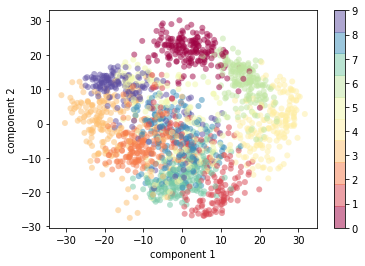

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(projected[:, 0], projected[:, 1],
           c=digits.target, edgecolor='none', alpha=0.5,
           cmap=plt.cm.get_cmap('Spectral', 10))

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## Components
* PCA can be seen as a process of choosing optimal Basis functions
    * such that adding the 1st few should be suitable to reconstruct the bulk of dataset
* Principal Components - the coefficients that multiply each element in this series

#### Choosing the number of components
* can be determined by looking at the cumulative explained variance ratio
    * as a function of the number of components

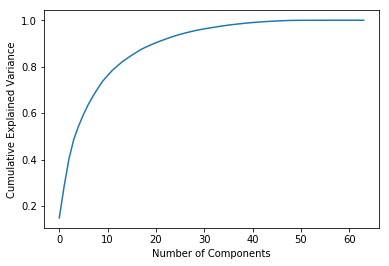

In [8]:
import numpy as np

pca = PCA().fit(digits.data)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

* Curve quantifies how much of the 64 dimensional variance is contained within N components
* The 1st 10 components contain about 75 % of the variance

## Noise Filtering
* components of much larger variance than the effect of noise - should be pretty unaffected than the noise

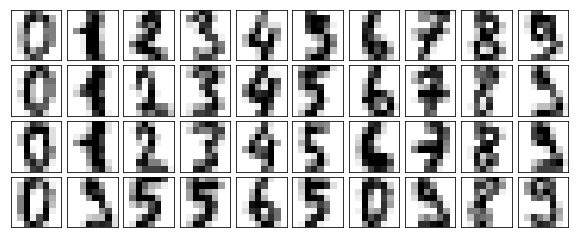

In [10]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10,4),
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),
                 cmap='binary', interpolation='nearest',
                 clim=(0,16))

plot_digits(digits.data)

* add random noise - create a noisy dataset - re-plot

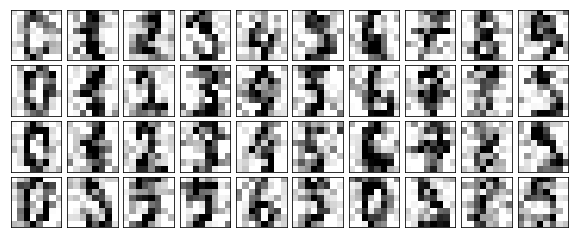

In [11]:
np.random.seed(42)

noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

#### Visually, it is clear the images are noisier - with spurious pixels
* Train a PCA on the noisy data
* Setting the projection to preserve 50 % of the variance

In [12]:
pca = PCA(0.50).fit(noisy)

pca.n_components_

12

* 50 % of the variance is reflected with 12 Principal Components
* Compute these components - use the Inverse Transform to reconstruct the filtered digits

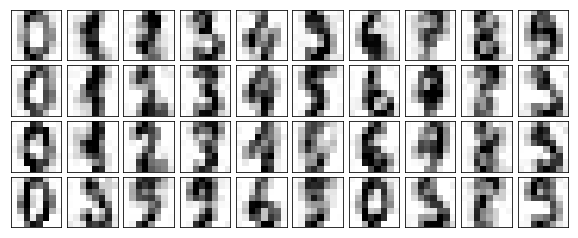

In [13]:
components = pca.transform(noisy)

filtered = pca.inverse_transform(components)

plot_digits(filtered)

* The signal preserving/noise filtering PCA property - can be a useful feature selection tool

## Another Example - Eigenfaces

In [14]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)

print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


#### Use RandomizedPCA
* for this Large dataset
* randomized method of approximating the 1st N components - more quickly than standard PCA
* look at the 1st 150 components

In [16]:
from sklearn.decomposition import RandomizedPCA

pca = RandomizedPCA(150)
pca.fit(faces.data)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


RandomizedPCA(copy=True, iterated_power=2, n_components=150,
       random_state=None, whiten=False)

#### Visualize the images associated with the 1st few Principal Components
* these are components are known as *Eigenvectors*
* these types of images are called *Eigenfaces*

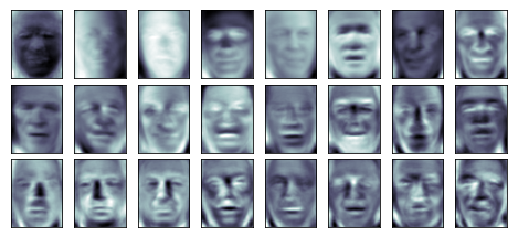

In [17]:
fig, axes = plt.subplots(3, 8, figsize=(9,4),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62,47), cmap='bone')

#### Results provide insight into how images vary
* the 1st few eigenfaces - perhaps associated with Lighting Angle
* later eigenfaces - seem to be associated with eyes, lips

#### View the cumulative variance of these components

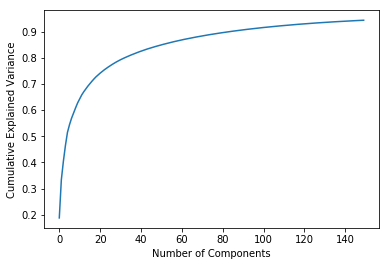

In [18]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

#### Appears with using 150 principal components - retrieve just over 90 % of the variance
* would mean most of the data characteristics would be recovered with these components

#### Compare the images constructed from these 150 components - with the input images

In [19]:
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


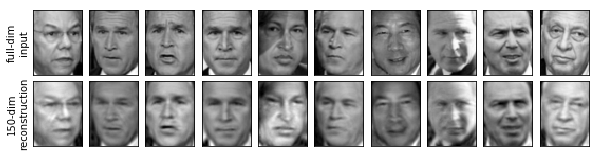

In [20]:
fig, ax = plt.subplots(2, 10, figsize=(10,2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62,47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62,47), cmap='binary_r')
    
ax[0,0].set_ylabel('full-dim\ninput')
ax[1,0].set_ylabel('150-dim\nreconstruction');

#### The photos constructed from the 150 (out of ~3000 original features) contain enough information to guess identities reasonably accurately
* it could be helpful to train with much less than 3000 features